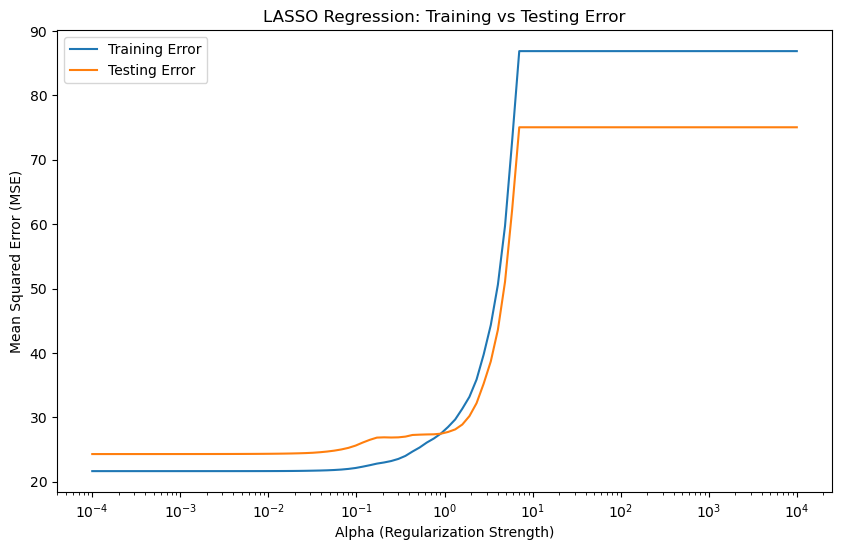

Optimal Alpha: 0.0001


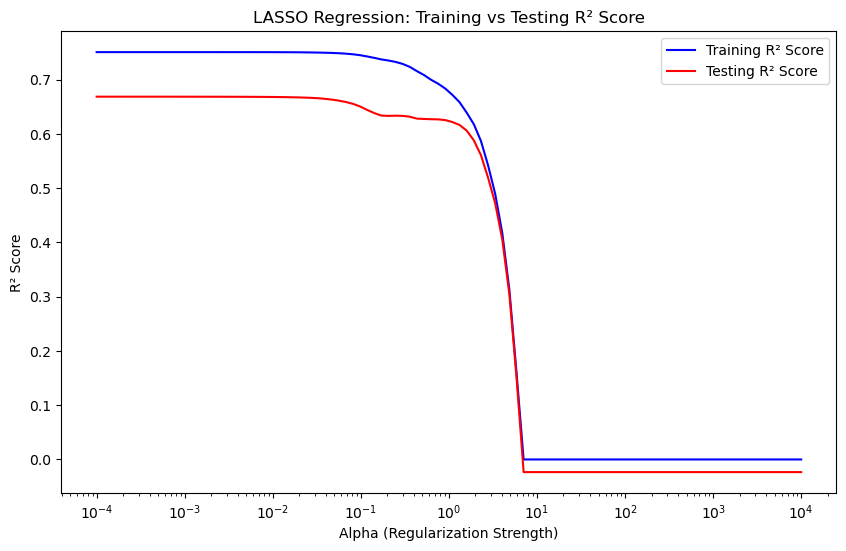

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')




# Separate features and target variable
X_train = train_data.drop('MEDV', axis=1)
y_train = train_data['MEDV']
X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']

# Standardize the features (important for KNN and Ridge/LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





# Train LASSO models with different alpha values
alphas = np.logspace(-4, 4, 100)
train_errors = []
test_errors = []
train_r2_scores = []
test_r2_scores = []


for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    # Training error
    y_train_pred = lasso.predict(X_train_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # Testing error
    y_test_pred = lasso.predict(X_test_scaled)
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))

# Plot the errors
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_errors, label='Training Error')
plt.semilogx(alphas, test_errors, label='Testing Error')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LASSO Regression: Training vs Testing Error')
plt.legend()
plt.show()

# Select optimal alpha
optimal_alpha = alphas[np.argmin(test_errors)]
print(f'Optimal Alpha: {optimal_alpha}')

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_r2_scores, label='Training R² Score', color='blue')
plt.semilogx(alphas, test_r2_scores, label='Testing R² Score', color='red')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('LASSO Regression: Training vs Testing R² Score')
plt.legend()
plt.show()